In [1]:
# Bibliotecas importantes:
import numpy as np # cálculo vetorial e algébricos
import pandas as pd # visualização de dados
import seaborn as sns # Plotagem de Gráficos
import matplotlib.pyplot as plt # Criação de Gráficos

In [2]:
dados_treino = pd.read_csv('C:/Users/user/Documents/Academia_UEA/Planilhas_covid19/WHO-COVID-global-08-05.csv') 
dados_treino

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
0,2020-02-24,AF,Afghanistan,EMRO,0,0,1,1
1,2020-02-25,AF,Afghanistan,EMRO,0,0,0,1
2,2020-02-26,AF,Afghanistan,EMRO,0,0,0,1
3,2020-02-27,AF,Afghanistan,EMRO,0,0,0,1
4,2020-02-28,AF,Afghanistan,EMRO,0,0,0,1
...,...,...,...,...,...,...,...,...
13949,2020-05-05,ZW,Zimbabwe,AFRO,0,4,0,34
13950,2020-05-06,ZW,Zimbabwe,AFRO,0,4,0,34
13951,2020-05-07,ZW,Zimbabwe,AFRO,0,4,0,34
13952,2020-05-08,ZW,Zimbabwe,AFRO,0,4,0,34


In [3]:
dados_br = dados_treino[dados_treino['Country Name']== 'Brazil']
dados_br

,day,Country,Country Name,Region,Deaths,Cumulative Deaths,Confirmed,Cumulative Confirmed
1713,2020-02-26,BR,Brazil,AMRO,0,0,1,1
1714,2020-02-27,BR,Brazil,AMRO,0,0,0,1
1715,2020-02-28,BR,Brazil,AMRO,0,0,0,1
1716,2020-02-29,BR,Brazil,AMRO,0,0,0,1
1717,2020-03-01,BR,Brazil,AMRO,0,0,1,2
...,...,...,...,...,...,...,...,...
1782,2020-05-05,BR,Brazil,AMRO,275,7025,4588,101147
1783,2020-05-06,BR,Brazil,AMRO,296,7321,6633,107780
1784,2020-05-07,BR,Brazil,AMRO,600,7921,6935,114715
1785,2020-05-08,BR,Brazil,AMRO,615,8536,10503,125218


In [4]:
dados_br.columns = ['Dia', 'Sigla', 'País', 'Região', 'Obitos', 'Obitos_Acumula', 'Confirmados', 'Confirmados_Acumula']
dados_br

,Dia,Sigla,País,Região,Obitos,Obitos_Acumula,Confirmados,Confirmados_Acumula
1713,2020-02-26,BR,Brazil,AMRO,0,0,1,1
1714,2020-02-27,BR,Brazil,AMRO,0,0,0,1
1715,2020-02-28,BR,Brazil,AMRO,0,0,0,1
1716,2020-02-29,BR,Brazil,AMRO,0,0,0,1
1717,2020-03-01,BR,Brazil,AMRO,0,0,1,2
...,...,...,...,...,...,...,...,...
1782,2020-05-05,BR,Brazil,AMRO,275,7025,4588,101147
1783,2020-05-06,BR,Brazil,AMRO,296,7321,6633,107780
1784,2020-05-07,BR,Brazil,AMRO,600,7921,6935,114715
1785,2020-05-08,BR,Brazil,AMRO,615,8536,10503,125218


In [5]:
# salvando documento em formato csv :
dados_br.to_csv('dados_covid_br_csv')

In [6]:
from sklearn.ensemble import RandomForestClassifier
Modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)

In [7]:
#OK, vamos tentar aplicar o Machine Learning com as variáveis 'Confirmados' e 'Obitos'.
estudo = ['Obitos', 'Confirmados']
x = dados_br[estudo]
y = dados_br['Obitos_Acumula']

In [8]:
x.head()

,Obitos,Confirmados
1713,0,1
1714,0,0
1715,0,0
1716,0,0
1717,0,1


In [9]:
y.head()

1713    0
1714    0
1715    0
1716    0
1717    0
Name: Obitos_Acumula, dtype: int64

In [10]:
Modelo.fit(x, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [11]:
x_prev = dados_br[estudo]
x_prev

,Obitos,Confirmados
1713,0,1
1714,0,0
1715,0,0
1716,0,0
1717,0,1
...,...,...
1782,275,4588
1783,296,6633
1784,600,6935
1785,615,10503


In [12]:
prever = Modelo.predict(x_prev)
prever

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          4,    4,   11,    0,    0,   46,    0,   57,    0,   77,   92,
        114,  136,  159,  201,  241,  299,  359,  432,  486,  553,  667,
        800,  941, 1056, 1124, 1223, 1328, 1532, 1736, 1924, 2141, 2347,
       2462, 2575, 2741, 2906, 3313, 3670, 4016, 4205, 4543, 5017, 5466,
       5901, 6329, 6750, 7025, 7321, 7921, 8536, 9146], dtype=int64)

In [13]:
pd.Series(prever)

0        0
1        0
2        0
3        0
4        0
      ... 
69    7025
70    7321
71    7921
72    8536
73    9146
Length: 74, dtype: int64

In [14]:
mago = pd.Series(prever, index=dados_br['Dia'], name="Num. Mortes")
mago.shape

(74,)

In [15]:
mago.to_csv("prevendo_coronga", header=True)
mago

Dia
2020-02-26       0
2020-02-27       0
2020-02-28       0
2020-02-29       0
2020-03-01       0
              ... 
2020-05-05    7025
2020-05-06    7321
2020-05-07    7921
2020-05-08    8536
2020-05-09    9146
Name: Num. Mortes, Length: 74, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_testa = np.arange(20)
x_testa

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [18]:
train_test_split(x_testa, test_size=0.5)
#Lembre_se que ele vai gerar uma lista  aleatoria para cada array P: teste e validação dos dados
# np.random.seed(0) --> é o comando que fará a interrupção de geração aleatória !

[array([17, 11,  1,  9,  2,  4,  0,  8, 15, 19]),
 array([ 6,  5, 18, 16, 13,  3, 10,  7, 12, 14])]

In [19]:
x_treino, x_valido, y_treino, y_valido = train_test_split(x, y, test_size=0.5)
x_treino.shape, x_valido.shape, y_treino.shape, y_valido.shape
# Na ultima linha ele vai dividir  os dados entre arrays para submeter aos testes!

((37, 2), (37, 2), (37,), (37,))

In [20]:
Modelo.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [21]:
Modelo.predict(x_valido)

array([   0, 1328,  114,  553,    0,    0,    0, 6750,    0, 5901, 5901,
        114, 2741, 5901,    0,    0, 2575,  241,  941,    0,    0,    0,
       6750,    0,  553,  941,    0, 2575, 1532,    0,  241, 2347,  241,
       6750, 4543, 4016,    0], dtype=int64)

In [22]:
Modelo.predict(x_treino)

array([7921,    0, 4016,    0,    0,    0,    0,    0,    0, 4205,   57,
       2741,  241,  159,    0,    0,  136,    0, 4543, 1736, 6750,    0,
        432,  553, 1328,    0, 7321, 2347, 5901, 1532,    4,  114,    0,
         46,  941, 2575,   11], dtype=int64)

In [23]:
param = Modelo.predict(x_valido)
np.mean(y_valido == param)

0.2972972972972973

In [24]:
from sklearn.model_selection import KFold

In [25]:
result = []
for repete in range(10):
    print("Num. Repe.:", repete)
    kf = KFold(3, shuffle=True, random_state=repete)

# Criando um loop for para obter mais resultados:
    for dados_treino, dados_validos in kf.split(x):
        print("Treinados:", dados_treino.shape[0])
        print("Teremos:", dados_validos.shape[0])

        # chamando as variaveis de treino:
        x_treino, x_valido = x.iloc[dados_treino], x.iloc[dados_validos]
        y_treino, y_valido = y.iloc[dados_treino], y.iloc[dados_validos]

        # copiando codigos antigos
        Modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
        Modelo.fit(x_treino, y_treino)
        param = Modelo.predict(x_valido)
        acu = np.mean(y_valido == param)
        
        # Por fim:
        result.append(acu)
        print("Acurácia:", acu)
        print()

Num. Repe.: 0
Treinados: 49
Teremos: 25
Acurácia: 0.12

Treinados: 49
Teremos: 25
Acurácia: 0.4

Treinados: 50
Teremos: 24
Acurácia: 0.3333333333333333

Num. Repe.: 1
Treinados: 49
Teremos: 25
Acurácia: 0.16

Treinados: 49
Teremos: 25
Acurácia: 0.28

Treinados: 50
Teremos: 24
Acurácia: 0.4583333333333333

Num. Repe.: 2
Treinados: 49
Teremos: 25
Acurácia: 0.24

Treinados: 49
Teremos: 25
Acurácia: 0.4

Treinados: 50
Teremos: 24
Acurácia: 0.20833333333333334

Num. Repe.: 3
Treinados: 49
Teremos: 25
Acurácia: 0.28

Treinados: 49
Teremos: 25
Acurácia: 0.2

Treinados: 50
Teremos: 24
Acurácia: 0.4166666666666667

Num. Repe.: 4
Treinados: 49
Teremos: 25
Acurácia: 0.4

Treinados: 49
Teremos: 25
Acurácia: 0.28

Treinados: 50
Teremos: 24
Acurácia: 0.16666666666666666

Num. Repe.: 5
Treinados: 49
Teremos: 25
Acurácia: 0.16

Treinados: 49
Teremos: 25
Acurácia: 0.28

Treinados: 50
Teremos: 24
Acurácia: 0.4166666666666667

Num. Repe.: 6
Treinados: 49
Teremos: 25
Acurácia: 0.16

Treinados: 49
Teremos:

In [26]:
from sklearn.model_selection import RepeatedKFold

In [27]:
# Vamos aumentar o campo de dados das variveis de treino
estudo = ['Obitos', 'Confirmados', 'Obitos_Acumula', 'Confirmados_Acumula']
x = dados_br[estudo]
y = dados_br['Obitos_Acumula']

In [28]:
# Vamos copiar o antigo codigo, porem com novas mudanças:
result = []
kf = RepeatedKFold(n_splits=3, n_repeats=5, random_state=5)

# Criando um loop for para obter mais resultados:
for dados_treino, dados_validos in kf.split(x):
    print("Treinados:", dados_treino.shape[0])
    print("Teremos:", dados_validos.shape[0])
        
#Aplicando as variaveis de previsão:
    x_treino, x_valido = x.iloc[dados_treino], x.iloc[dados_validos]
    y_treino, y_valido = y.iloc[dados_treino], y.iloc[dados_validos]
        
#Repetindo codigos passados:
    Modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    Modelo.fit(x_treino, y_treino)
    param = Modelo.predict(x_valido)
    acu = np.mean(y_valido == param)
        
#No final teremos:
    result.append(acu)
    print("Acurácia:", acu)
    print()

Treinados: 49
Teremos: 25
Acurácia: 0.2

Treinados: 49
Teremos: 25
Acurácia: 0.32

Treinados: 50
Teremos: 24
Acurácia: 0.4166666666666667

Treinados: 49
Teremos: 25
Acurácia: 0.28

Treinados: 49
Teremos: 25
Acurácia: 0.28

Treinados: 50
Teremos: 24
Acurácia: 0.375

Treinados: 49
Teremos: 25
Acurácia: 0.32

Treinados: 49
Teremos: 25
Acurácia: 0.32

Treinados: 50
Teremos: 24
Acurácia: 0.2916666666666667

Treinados: 49
Teremos: 25
Acurácia: 0.24

Treinados: 49
Teremos: 25
Acurácia: 0.24

Treinados: 50
Teremos: 24
Acurácia: 0.4583333333333333

Treinados: 49
Teremos: 25
Acurácia: 0.36

Treinados: 49
Teremos: 25
Acurácia: 0.28

Treinados: 50
Teremos: 24
Acurácia: 0.4583333333333333



In [29]:
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


(array([1., 2., 0., 4., 3., 0., 2., 0., 1., 2.]),
 array([0.2       , 0.22583333, 0.25166667, 0.2775    , 0.30333333,
        0.32916667, 0.355     , 0.38083333, 0.40666667, 0.4325    ,
        0.45833333]),
 <a list of 10 Patch objects>)

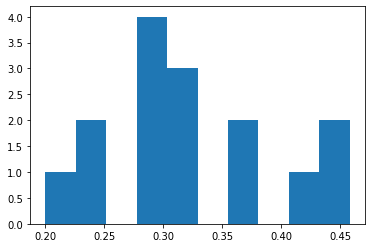

In [30]:
pylab.hist(result)

In [31]:
#Refazer o treino:
dados_br[estudo]

,Obitos,Confirmados,Obitos_Acumula,Confirmados_Acumula
1713,0,1,0,1
1714,0,0,0,1
1715,0,0,0,1
1716,0,0,0,1
1717,0,1,0,2
...,...,...,...,...
1782,275,4588,7025,101147
1783,296,6633,7321,107780
1784,600,6935,7921,114715
1785,615,10503,8536,125218


In [32]:
Modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
Modelo.fit(x, y)
param = Modelo.predict(dados_br[estudo])
param

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
          4,    4,   11,   11,   11,   46,   46,   57,   57,   77,   92,
        114,  136,  159,  201,  241,  299,  359,  432,  486,  553,  667,
        800,  941, 1056, 1124, 1223, 1328, 1532, 1736, 1924, 2141, 2347,
       2462, 2575, 2741, 2906, 3313, 3670, 4016, 4205, 4543, 5017, 5466,
       5901, 6329, 6750, 7025, 7321, 7921, 8536, 9146], dtype=int64)

In [33]:
bruxo = pd.Series(param, index=dados_br['Dia'], name="Num. Mortes")
bruxo.shape

(74,)

In [34]:
print(bruxo) #estamos chamando o 'param' mas em formato vertical

Dia
2020-02-26       0
2020-02-27       0
2020-02-28       0
2020-02-29       0
2020-03-01       0
              ... 
2020-05-05    7025
2020-05-06    7321
2020-05-07    7921
2020-05-08    8536
2020-05-09    9146
Name: Num. Mortes, Length: 74, dtype: int64
